# DNA Hairpin

In this tutorial we are going to infer Langevin model on experimental data of DNA hairpin.
The data are from the following article:
Quantifying the Properties of Nonproductive Attempts at Thermally Activated Energy-Barrier Crossing through Direct Observation, Aaron Lyons, Anita Devi, Noel Q. Hoffer, and Michael T. Woodside. Phys. Rev. X 14, 011017.
The trajectories are available at https://doi.org/10.6084/m9.figshare.24794955.

First download the data and load the trajectories. Don't forget to adapt the location of the file

In [1]:
import numpy as np
import folie as fl

data = fl.Trajectories(dt=1.0e-3) # Sampling frequency was 1MHz from the article, using then ms time unit
n=1 # Let's use the first molecule.
trj = np.loadtxt(f"../../../Lyons_etal_PRX_2023_Data/Hairpin Constant Force Data/Molecule {n}/HP_CF_Mol{n}_SampleTrajectory.txt")
data.append(trj.reshape(-1,1))
print(data) #Let's check what we have

Trajectory of length 2000000 and dimension 1.



Then define a model, here we are going to use the default 1D overdamped model. We can then fit the model. To start we use a simple KramersMoyal estimation

In [2]:
domain = fl.MeshedDomain.create_from_range(np.linspace(data.stats.min, data.stats.max, 10).ravel())
model = fl.models.OverdampedSplines1D(domain)
estimator = fl.KramersMoyalEstimator(model)
model = estimator.fit_fetch(data)

We can then plot the force and diffusion profile

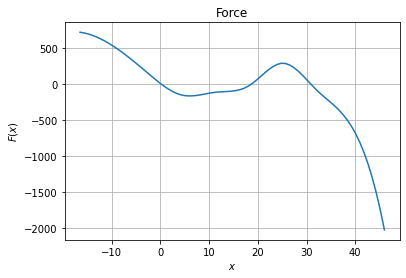

In [3]:
import matplotlib.pyplot as plt

xfa = np.linspace(np.min(trj),np.max(trj),75)
fig, ax = plt.subplots(1, 1)
# Force plot
ax.set_title("Force")
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$")
ax.grid()
ax.plot(xfa, model.pos_drift(xfa.reshape(-1, 1)))


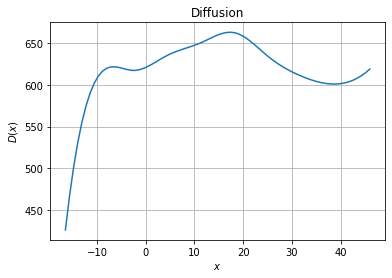

In [4]:
fig, ax = plt.subplots(1, 1)
# Diffusion plot
ax.set_title("Diffusion")
ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$D(x)$")
ax.plot(xfa, model.diffusion(xfa.reshape(-1, 1)))

But also obtain the free energy profile

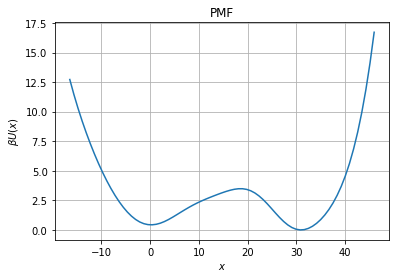

In [5]:
pmf=fl.analysis.free_energy_profile_1d(model, xfa)
fig, ax = plt.subplots(1, 1)
# Diffusion plot
ax.set_title("PMF")
ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$\\beta U(x)$")
ax.plot(xfa, pmf)

The next step is to compute the folding/unfolding rate

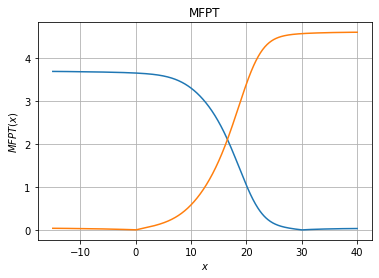

In [6]:
xfa_to_unfold,mfpt_to_unfold = fl.analysis.mfpt_1d(model, 30, [-15,40], Npoints=500)
xfa_to_fold,mfpt_to_fold = fl.analysis.mfpt_1d(model, 0, [-15,40], Npoints=500)
fig, ax = plt.subplots(1, 1)
ax.set_title("MFPT")
ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$MFPT(x)$")
ax.plot(xfa_to_unfold, mfpt_to_unfold)
ax.plot(xfa_to_fold,mfpt_to_fold)